In [72]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#loading the data set , to pandas dataframe
credit_card_data=pd.read_csv('fraud.csv')

In [74]:
credit_card_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [75]:
credit_card_data.tail(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362590,741,TRANSFER,323726.61,C509686434,323726.61,0.0,C1310143791,0.00,0.00,1,0
6362591,741,CASH_OUT,323726.61,C919525792,323726.61,0.0,C993635374,561753.58,885480.19,1,0
6362592,741,TRANSFER,383661.10,C457476945,383661.10,0.0,C1688658215,0.00,0.00,1,0
6362593,741,CASH_OUT,383661.10,C369315575,383661.10,0.0,C2069429837,1788112.70,2171773.80,1,0
6362594,741,TRANSFER,144945.34,C31496887,144945.34,0.0,C1251365829,0.00,0.00,1,0
6362595,741,CASH_OUT,144945.34,C1092829426,144945.34,0.0,C716019997,0.00,144945.34,1,0
6362596,741,TRANSFER,48442.88,C1112979339,48442.88,0.0,C2114078084,0.00,0.00,1,0
6362597,741,CASH_OUT,48442.88,C1706094385,48442.88,0.0,C2109905271,513746.19,562189.07,1,0
6362598,742,TRANSFER,4009058.39,C1044665079,4009058.39,0.0,C750074708,0.00,0.00,1,0
6362599,742,CASH_OUT,4009058.39,C1970706589,4009058.39,0.0,C637394241,1229761.96,5238820.34,1,0


In [76]:
#getting the dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [77]:
#checking the no. of missing values in each column
credit_card_data.isnull().sum()#how to handle missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

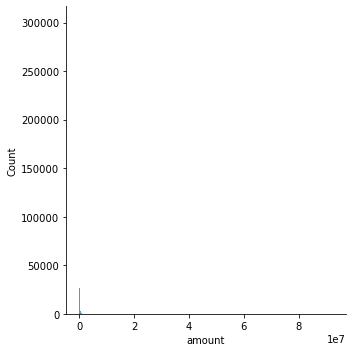

In [78]:
#checking for outliers
sns.displot(credit_card_data["amount"])
plt.show()


C:\Users\Kartikay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

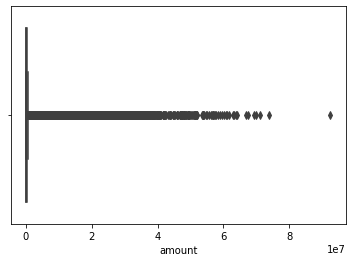

In [79]:
# to see outliers clearly we use boxplot
sns.boxplot(credit_card_data["amount"])

removing the outliers using z score method

In [80]:
upper_limit=credit_card_data['amount'].mean()+3*credit_card_data['amount'].std()
lower_limit=credit_card_data['amount'].mean()-3*credit_card_data['amount'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 1991436.597938102
lower limit: -1631712.7908398563


In [81]:
# finding the outliers
credit_card_data.loc[(credit_card_data['amount']>upper_limit)| (credit_card_data['amount']<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
359,1,TRANSFER,2421578.09,C106297322,0.00,0.00,C1590550415,8515645.77,19169204.93,0,0
375,1,TRANSFER,2545478.01,C1057507014,0.00,0.00,C1590550415,12394437.40,19169204.93,0,0
376,1,TRANSFER,2061082.82,C2007599722,0.00,0.00,C1590550415,14939915.42,19169204.93,0,0
1153,1,TRANSFER,3776389.09,C197491520,0.00,0.00,C1883840933,10138670.86,16874643.09,0,0
1202,1,TRANSFER,2258388.15,C12139181,0.00,0.00,C1789550256,2784129.27,4619798.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.00,0.00,1,1
6362598,742,TRANSFER,4009058.39,C1044665079,4009058.39,0.00,C750074708,0.00,0.00,1,0
6362599,742,CASH_OUT,4009058.39,C1970706589,4009058.39,0.00,C637394241,1229761.96,5238820.34,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


In [82]:
#trimming or deleting the outlier data
new_df=credit_card_data.loc[(credit_card_data['amount']<upper_limit)&(credit_card_data['amount']>lower_limit)]
print("befor removing outliers",len(credit_card_data))
print("after removing",len(new_df))


befor removing outliers 6362620
after removing 6317675


C:\Users\Kartikay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

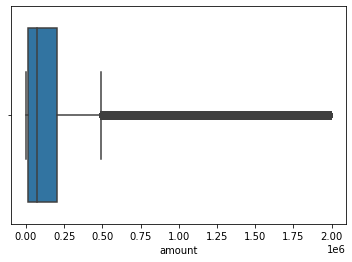

In [83]:
sns.boxplot(new_df['amount'])

In [84]:
#checking for colinearity
new_df.dtypes.unique()


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [85]:
num=['int64','float64']
num_vars=list(new_df.select_dtypes(include=num))

In [86]:
num_vars

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [87]:
new_df=new_df[num_vars]
new_df.shape
new_df.isna().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [89]:
corrmatrix=x_train.corr()
corrmatrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,0.138806,-0.027892,-0.060655,0.004648,0.009439,0.013782
amount,0.138806,1.000000,0.080724,-0.069992,0.035638,0.100232,0.017188
oldbalanceOrg,-0.027892,0.080724,1.000000,0.985137,0.061064,0.050977,0.018898
newbalanceOrig,-0.060655,-0.069992,0.985137,1.000000,0.067504,0.047831,0.020038
oldbalanceDest,0.004648,0.035638,0.061064,0.067504,1.000000,0.994372,-0.004447
newbalanceDest,0.009439,0.100232,0.050977,0.047831,0.994372,1.000000,-0.005196
isFlaggedFraud,0.013782,0.017188,0.018898,0.020038,-0.004447,-0.005196,1.000000


In [90]:
def correlation(df,threshold):
    correlated_cols=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols
correlation(x_train,0.6)

{'newbalanceDest', 'newbalanceOrig'}

In [92]:
#distribution of legit and fraudelent transactions
new_df['isFraud'].value_counts()

0    6311148
1       6527
Name: isFraud, dtype: int64

This dataset is ighl unbalanced 
0 --> normal transaction
1 --> fraudelent transactions


In [93]:
#separating the data for analysis
legit=new_df[credit_card_data.isFraud==0]
fraud=new_df[credit_card_data.isFraud==1]

C:\Users\Kartikay\AppData\Local\Temp\ipykernel_24168\2923407834.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit=new_df[credit_card_data.isFraud==0]
C:\Users\Kartikay\AppData\Local\Temp\ipykernel_24168\2923407834.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud=new_df[credit_card_data.isFraud==1]


In [94]:
print(legit.shape)
print(fraud.shape)

(6311148, 8)
(6527, 8)


In [95]:
# stastical measures for the data
legit.amount.describe()

count    6.311148e+06
mean     1.466214e+05
std      2.137911e+05
min      1.000000e-02
25%      1.323243e+04
50%      7.315851e+04
75%      2.049003e+05
max      1.991430e+06
Name: amount, dtype: float64

In [96]:
fraud.amount.describe()

count    6.527000e+03
mean     4.661128e+05
std      4.895139e+05
min      0.000000e+00
25%      9.348323e+04
50%      2.726372e+05
75%      6.972262e+05
max      1.989311e+06
Name: amount, dtype: float64

In [97]:
#compare the values for both transactions
new_df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,242.872887,146621.360474,838252.674669,861831.376157,1.057032e+06,1.142979e+06,0.000000
1,366.584189,466112.847081,466221.807028,2049.062520,5.534864e+05,7.912769e+05,0.000613


we will perform under sampling
that is we will build a new data set containing similar distribution of normal and fraudelent transactions
fraud transactions-->8213

In [98]:
legit_sample=legit.sample(n=8213)

Concatenating two data frames

In [99]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)#b\c we want add values row wise

In [100]:
new_dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5513955,380,46888.09,17473.41,0.00,0.00,0.00,0,0
3706598,277,16106.00,12421.00,0.00,0.00,0.00,0,0
1178610,132,672504.60,111145.00,783649.60,1152440.39,479935.79,0,0
800733,40,5723.44,0.00,0.00,0.00,0.00,0,0
4958403,351,109848.59,577560.79,687409.39,531523.64,369433.83,0,0


In [101]:
new_dataset.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362613,743,1258818.82,1258818.82,0.0,503464.50,1762283.33,1,0
6362614,743,339682.13,339682.13,0.0,0.00,0.00,1,0
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,743,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [102]:
new_dataset['isFraud'].value_counts

<bound method IndexOpsMixin.value_counts of 5513955    0
3706598    0
1178610    0
800733     0
4958403    0
          ..
6362613    1
6362614    1
6362615    1
6362618    1
6362619    1
Name: isFraud, Length: 14740, dtype: int64>

In [103]:
new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,242.656520,143096.271260,807857.894436,830215.275595,994461.369861,1.077120e+06,0.000000
1,366.584189,466112.847081,466221.807028,2049.062520,553486.439144,7.912769e+05,0.000613


splitting the data into features and target

In [108]:
x=new_dataset.drop(['isFraud','newbalanceDest', 'newbalanceOrig'],axis=1)
y=new_dataset['isFraud']

In [109]:
print(x)

         step      amount  oldbalanceOrg  oldbalanceDest  isFlaggedFraud
5513955   380    46888.09       17473.41            0.00               0
3706598   277    16106.00       12421.00            0.00               0
1178610   132   672504.60      111145.00      1152440.39               0
800733     40     5723.44           0.00            0.00               0
4958403   351   109848.59      577560.79       531523.64               0
...       ...         ...            ...             ...             ...
6362613   743  1258818.82     1258818.82       503464.50               0
6362614   743   339682.13      339682.13            0.00               0
6362615   743   339682.13      339682.13            0.00               0
6362618   743   850002.52      850002.52            0.00               0
6362619   743   850002.52      850002.52      6510099.11               0

[14740 rows x 5 columns]


In [111]:
print(y)

5513955    0
3706598    0
1178610    0
800733     0
4958403    0
          ..
6362613    1
6362614    1
6362615    1
6362618    1
6362619    1
Name: isFraud, Length: 14740, dtype: int64


split the data into training data and testing data

In [112]:
print(x.shape,x_train.shape,x_test.shape)

(14740, 5) (11792, 7) (2948, 7)


training the model using logistic regression because is gives better accuracy for binary values

In [113]:
model=LogisticRegression()

In [114]:
#training the logistic regression model with training data
model.fit(x_train,y_train)#x_train contains all the features and the y_train contains all the lables

LogisticRegression()

Evaluating our model

In [115]:
#finding accuracy on training data
x_train_prediction =model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)


In [116]:
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 0.9508989145183175


In [117]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [118]:
print("accuracy score of test data:",test_data_accuracy)

accuracy score of test data: 0.9470827679782904


Candidate Expectations:
1. Data cleaning including missing values, outliers and multi-collinearity.
Ans:- Fraud.csv file was thoroughly checked for missing values , none were found. Outliners were found and were removed. the accuracy of the model improved by approximately 5 percent. multi collinearity was also found in multiple columns which were removed.
2. Describe your fraud detection model in elaboration.
Ans:- the steps involved in building my model are:-
step 1:- loading csv files in to the data frame
step 2:-data processing was done to improves the quality of the data. the steps involved in data processing are removing missing values, removing outliers and removing multi-collinearity.
step 3:-after processing the data the logistic model is trained and tested based on the  values
step 4:- finally the model is evaluated
3. How did you select variables to be included in the model?
Ans:- Amount is an excellent varibale which can be used to consider a transaction fraudelent or not.
4. Demonstrate the performance of the model by using best set of tools.
Ans:- I used accuracy to determine the performance of the model. The accuracy of the model came out to be above 94%.
5. What are the key factors that predict fraudulent customer?
Ans:-Transaction Amount , nameOrig , oldbalanceOrig are some features that can be used to detect fraud. there might be other factors included such as time of transaction etc.

6. Do these factors make sense? If yes, How? If not, How not?
Ans:- Yes these factors make sense.Checking for unusual money transfers: high amounts, mismatched names, big balance changes. Is a good way to check frauds.
